In [110]:
%run IDM_helper_functions.ipynb

In [2]:
W_pos, W_neg = 52500, 8400
B1, B2 = 0, 0
N, theta = 2000, 51450

y1, y2 = 0.2, 0.2
beta=1/24
print(energy(y1,y2))
print(dEdy1(y1, y2, W_pos, W_neg, B1, theta))
print(dEdy2(y1,y2, W_pos, W_neg, B2, theta))
print(free_energy(y1,y2,N=2000))
print(dFdy1(y1,y2, W_pos, W_neg, B1, theta, beta, N))
print(dFdy2(y1,y2, W_pos, W_neg, B2, theta, beta, N))

16716.0
32130.0
32130.0
-7303.316329833018
-1141.064666877377
-1141.064666877377


In [43]:
# Training data
n_sim_train = 50000
prior_IDM = utils.BoxUniform(low=[0,0.2,0.1,0.01], high=[0.8,0.6,0.6,0.1])
param_IDM = prior_IDM.sample((n_sim_train,))
x_IDM_train = simul_IDM_EM(np.array(param_IDM))



In [44]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior_IDM)
trainer = trainer.append_simulations(param_IDM, x_IDM_train)
mnle = trainer.train()


 Neural network successfully converged after 38 epochs.

In [45]:
#
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")
#mcmc_parameters=dict(init_strategy="resample", num_chains=10, warmup_steps=100)
#mnle_posterior = trainer.build_posterior(mnle, prior)


In [46]:
# inference with different x_o that has 100 trials
#torch.manual_seed(41)
num_trials = 100
num_samples = 100
parameters_o = prior_IDM.sample((1,))
x_o = simul_IDM_EM(np.array(parameters_o.repeat(num_trials, 1)))

In [47]:
mnle_posterior = trainer.build_posterior(mnle, prior_IDM)
mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

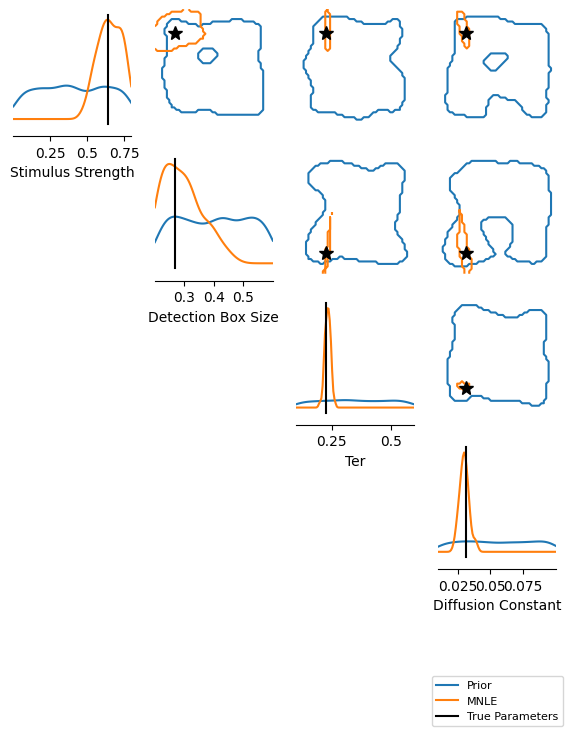

In [100]:
pair_plot(prior_IDM, mnle_samples, parameters_o, figsize = (7,7), contour = 0.7, 
          labels=['Stimulus Strength', 'Detection Box Size','Ter', 'Diffusion Constant'])

## Simulate from DDM and fit from IDM from my code


In [111]:
n_trials = 500
sim_num = 30

prior_DDM = utils.BoxUniform(low=[0,0.6,0.2], high=[4,2,0.6])  ## V, a, ter
prior_IDM = utils.BoxUniform(low=[0,0.2,0.1,0.01], high=[0.8,0.6,0.6,0.1]) ## C, h, Ter, D
param_DDM, par_fitted = DDM_IDM(prior_DDM, prior_IDM, c = 1, n_trials = n_trials, sim_num = sim_num)
np.savetxt('param_DDM_D1_N500.csv', param_DDM, delimiter=',')
np.savetxt('param_IDM_D1_N500.csv', par_fitted, delimiter=',')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


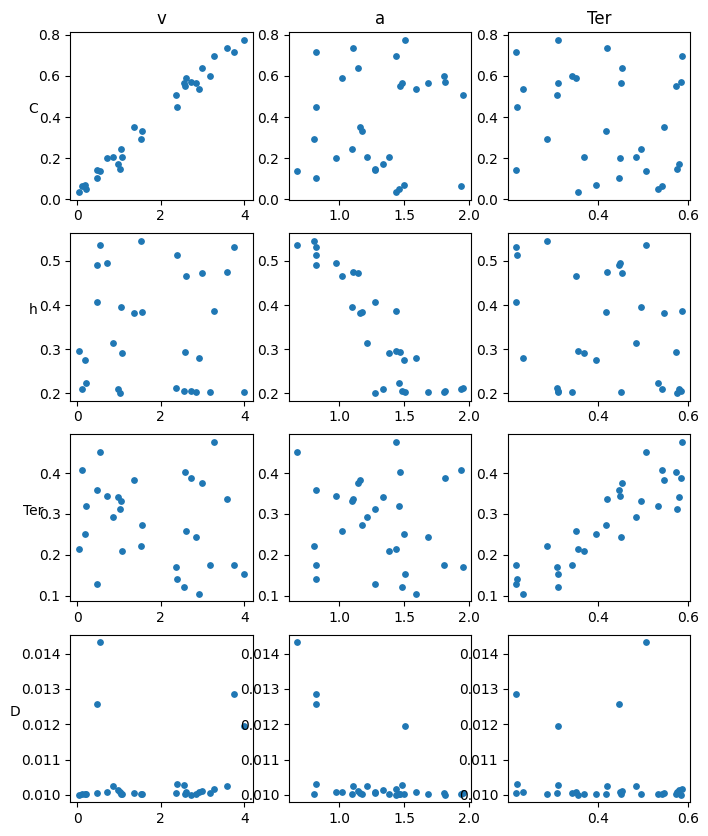

In [112]:
par_labels = ["v", "a", "Ter"]
par_fitted_labels = ["C", "h", "Ter", "D"]
sim_fit_plot_all(param_DDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,10))



In [113]:
n_trials = 250
sim_num = 30

prior_DDM = utils.BoxUniform(low=[0,0.6,0.2], high=[4,2,0.6])  ## V, a, ter
prior_IDM = utils.BoxUniform(low=[0,0.2,0.1,0.01], high=[0.8,0.6,0.6,0.1]) ## C, h, Ter, D
param_DDM, par_fitted = DDM_IDM(prior_DDM, prior_IDM, c = 0.1, n_trials = n_trials, sim_num = sim_num)
np.savetxt('param_DDM_D01_N500.csv', param_DDM, delimiter=',')
np.savetxt('param_IDM_D01_N500.csv', par_fitted, delimiter=',')




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


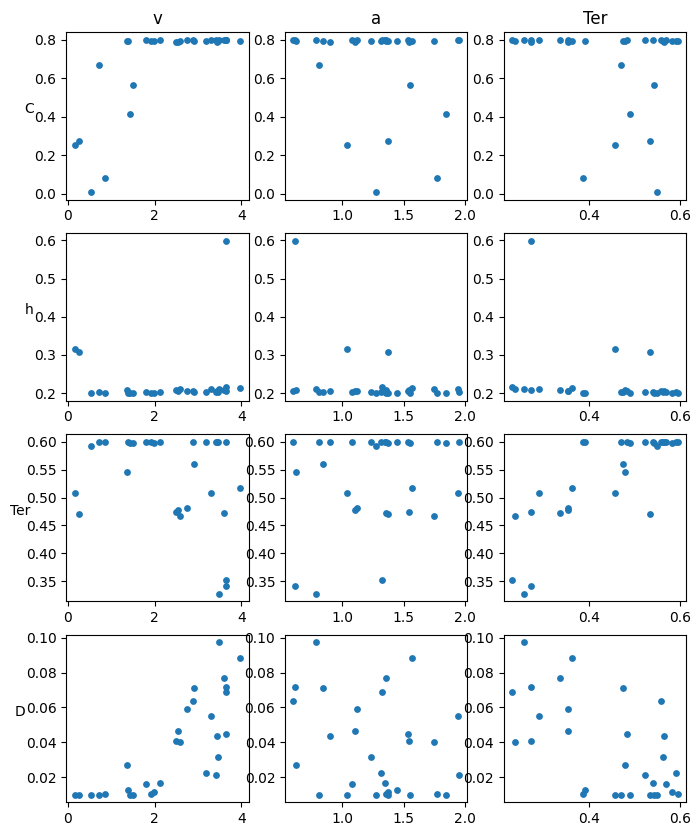

In [114]:
sim_fit_plot_all(param_DDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,10))


In [115]:
n_trials = 250
sim_num = 30

prior_DDM = utils.BoxUniform(low=[0,0.6,0.2], high=[4,2,0.6])  ## V, a, ter
prior_IDM = utils.BoxUniform(low=[0,0.2,0.1,0.01], high=[0.8,0.6,0.6,0.1]) ## C, h, Ter, D
param_DDM, par_fitted = DDM_IDM(prior_DDM, prior_IDM, c = 0.5, n_trials = n_trials, sim_num = sim_num)
np.savetxt('param_DDM_D05_N500.csv', param_DDM, delimiter=',')
np.savetxt('param_IDM_D05_N500.csv', par_fitted, delimiter=',')




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


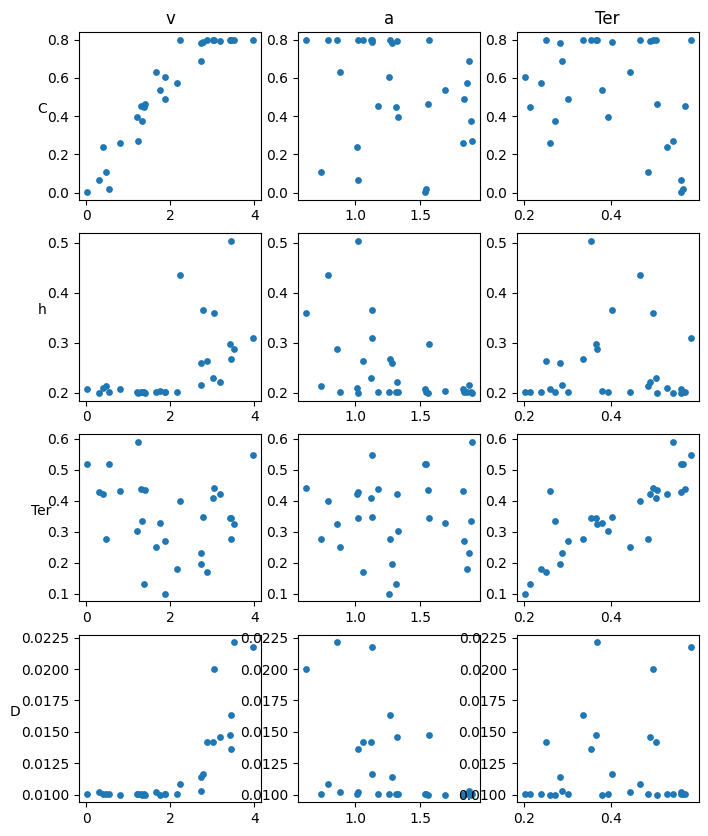

In [116]:
sim_fit_plot_all(param_DDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,10))


In [ ]:
data = np.loadtxt('data.csv', delimiter=',')
# print the array
data.shape

